In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
file_path = '/content/Survey.csv'
data = pd.read_csv(file_path)

In [4]:
subset_data = data.iloc[:, 18:46]

In [5]:
print(subset_data.head())

   2.Proximity to schools  3. Proximity to transport  \
0                       5                          5   
1                       5                          5   
2                       2                          5   
3                       5                          3   
4                       2                          3   

   4. Proximity to work place  5. Proximity to shopping  \
0                           2                         1   
1                           3                         1   
2                           2                         1   
3                           5                         4   
4                           4                         3   

   1. Gym/Pool/Sports facility  2. Parking space  3.Power back-up  \
0                            2                 5                3   
1                            1                 4                2   
2                            4                 3                2   
3                            5  

In [6]:
numeric_data = subset_data.select_dtypes(include=['float64', 'int64'])

In [7]:
print(numeric_data.isna().sum().sum())

0


In [8]:
numeric_data = numeric_data.dropna()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

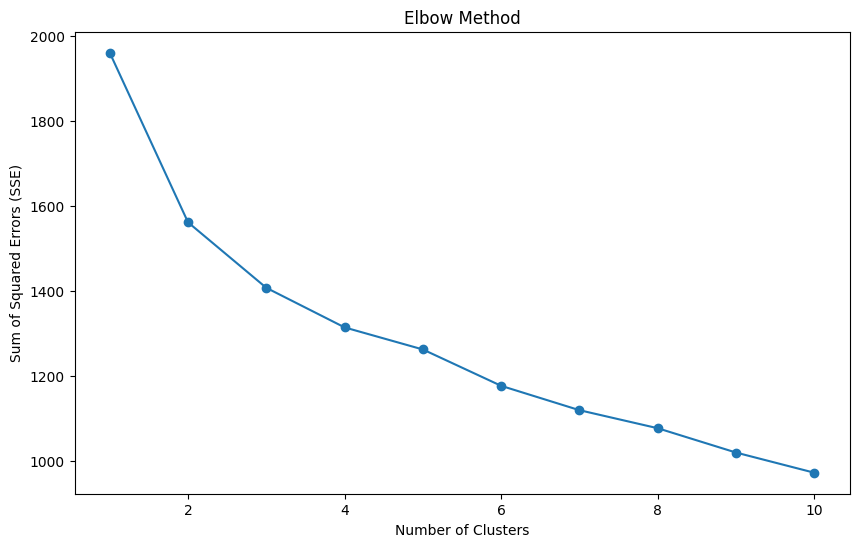

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [5]:
data_encoded = pd.get_dummies(subset_data)


In [12]:
numeric_data = data_encoded.select_dtypes(include=[np.number])

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
data['Cluster'] = kmeans_labels



In [18]:
cluster_characteristics = data.groupby('Cluster').mean(numeric_only=True)

In [19]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [20]:
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels

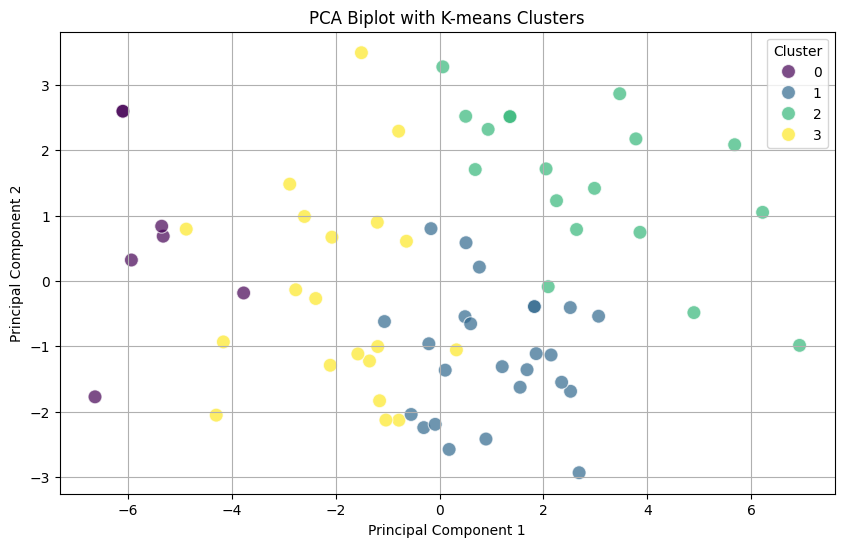

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA Biplot with K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

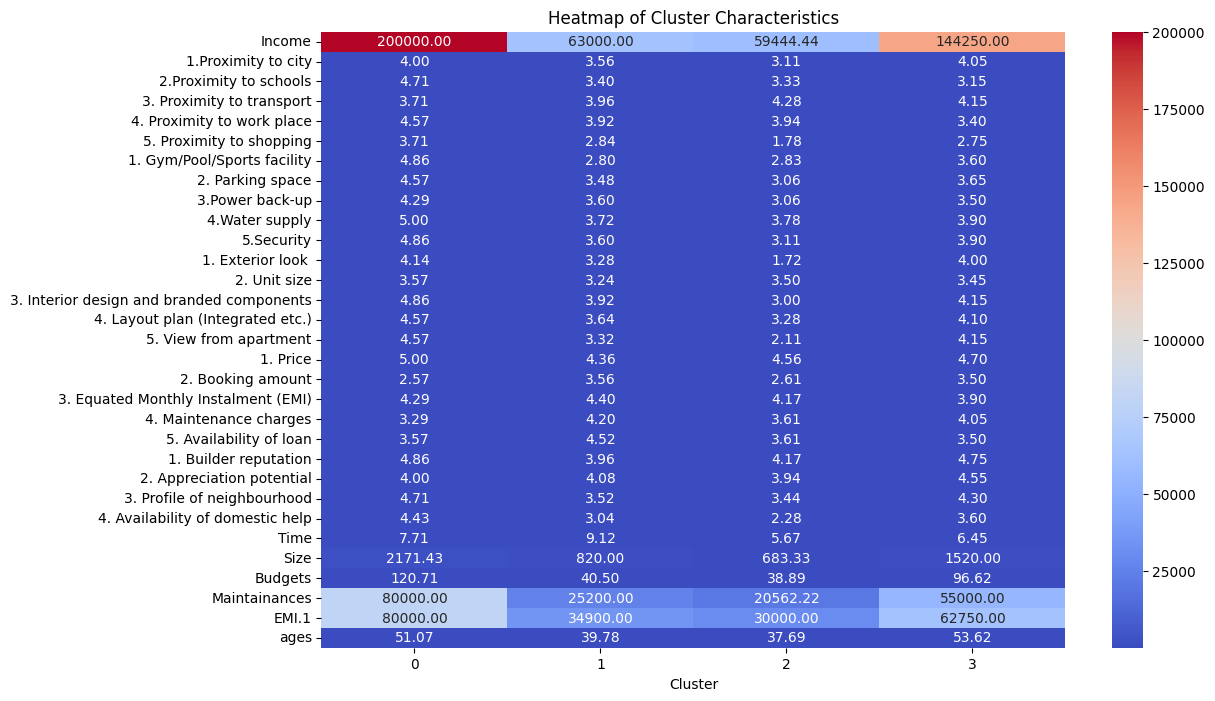

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_characteristics.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Cluster Characteristics')
plt.show()